In [1]:
#import required libraries
import pandas as pd
import string
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

In [2]:
#set col width to 100
pd.set_option('display.max_colwidth', 100)

#stop word removal
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
from nltk.tokenize import word_tokenize

#Importing the csv file
df = pd.read_csv(r"D:\DataScienceProjects\news\news.csv")
df.rename( columns = {'Unnamed: 0': 'Id'}, inplace=True)

#get the size of dataset
print(df.shape)
df.head()

(6335, 4)


,Id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focu...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO),Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two ...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,"U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, am...",REAL
3,10142,Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!',"— Kaydee King (@KaydeeKing) November 9, 2016 The lesson from tonight's Dem losses: Time for Demo...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in t...,REAL


In [3]:
#remove numeric values from dataset
df['text'] = df['text'].str.replace('\d+', '')

In [4]:
#add words that aren't in the NLTK stopwords list
new_stopwords = ['included','including','includes','one','two','three','general','generally','way','better','need','really','believe','provide','say','saying','says','include','said','also','would','could','end','recent','recently','us','like','make','may','look','still','come','see','across','even','much','get','allow','allows','allowed','allowing','well','go','gone','going','that','thats','take','thing','come','move','give','help','put','dont','people','got','kind','know','day','think','continue','look','year','years','new','use','there','want','wanted','please']
new_stopwords_list = stopwords.extend(new_stopwords)

In [5]:
#data cleaning- removing punctuations, tokenize, stop words
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    text = set([ps.stem(word) for word in tokens if word not in stopwords])
    return text

In [6]:
# Converting Categorical values of "label" column to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])


In [7]:
df.head()

,Id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focu...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO),Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two ...,0
2,3608,Kerry to go to Paris in gesture of sympathy,"U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, am...",1
3,10142,Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!',"— Kaydee King (@KaydeeKing) November , The lesson from tonight's Dem losses: Time for Democrats...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in t...,1


In [8]:
#Split into train/test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['text']], df['label'], test_size=0.25)

In [9]:
#Normalization technique using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text, max_features=500, min_df = 3, max_df = 0.7)
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())

X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.0,0.000000,0.0,0.0,0.116272,0.121474,0.000000,0.114435,0.000000,...,0.000000,0.133555,0.000000,0.000000,0.111148,0.000000,0.118796,0.062152,0.068484,0.068711
1,0.099177,0.0,0.076807,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048392,0.053322,0.053499
2,0.074352,0.0,0.000000,0.0,0.0,0.067869,0.070906,0.079414,0.066797,0.000000,...,0.083516,0.000000,0.065613,0.000000,0.064879,0.055856,0.069343,0.036279,0.039975,0.040108
3,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.105011,0.000000,0.000000,0.092319,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.082722,0.000000,0.053728,0.059202,0.059399
4,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.102038,0.000000,0.000000,0.000000,0.054023,0.059526,0.059724


In [10]:
print(tfidf_vect.get_feature_names())

['abl', 'accept', 'accord', 'account', 'accus', 'act', 'action', 'activ', 'actual', 'ad', 'addit', 'address', 'administr', 'ago', 'agre', 'aid', 'almost', 'along', 'alreadi', 'although', 'alway', 'america', 'american', 'among', 'announc', 'anoth', 'answer', 'anyon', 'anyth', 'appear', 'area', 'argu', 'arm', 'around', 'articl', 'ask', 'associ', 'attack', 'attempt', 'author', 'away', 'back', 'bad', 'barack', 'base', 'becom', 'began', 'begin', 'behind', 'believ', 'best', 'big', 'bill', 'black', 'break', 'bring', 'build', 'bush', 'busi', 'call', 'came', 'campaign', 'candid', 'care', 'carri', 'case', 'caus', 'center', 'challeng', 'chanc', 'chang', 'charg', 'chief', 'children', 'citi', 'citizen', 'claim', 'clear', 'clinton', 'close', 'cnn', 'come', 'comment', 'commit', 'committe', 'commun', 'compani', 'complet', 'concern', 'congress', 'conserv', 'consid', 'continu', 'contribut', 'control', 'convent', 'countri', 'cours', 'court', 'creat', 'critic', 'current', 'day', 'deal', 'death', 'debat', 

In [11]:
sum_words = tfidf_train.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

[('’', 203.59505354803926),
 ('“', 184.3109597494625),
 ('”', 182.71416788634636),
 ('state', 166.56111704314762),
 ('time', 165.9692930071457),
 ('presid', 154.43883392168036),
 ('trump', 151.01494903738705),
 ('report', 150.8154626330071),
 ('clinton', 145.28351845089531),
 ('elect', 142.8080001467161),
 ('first', 142.51950259936643),
 ('support', 142.42621772391095),
 ('call', 141.772115911995),
 ('hillari', 141.66460805873564),
 ('campaign', 140.1725777685857),
 ('nation', 138.1820065505618),
 ('mani', 137.34876171124282),
 ('news', 136.44721886917156),
 ('american', 135.66892653652488),
 ('last', 135.1652057020296),
 ('democrat', 134.2277117213017),
 ('work', 133.67121047024187),
 ('republican', 132.74254835573805),
 ('polit', 132.56862591943442),
 ('—', 131.70561691687942),
 ('obama', 131.26086204900142),
 ('countri', 130.893661374839),
 ('show', 130.79378811906523),
 ('right', 130.15520432007608),
 ('back', 128.9961947182887),
 ('donald', 126.4478119715755),
 ('made', 125.535533

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [13]:
#Function to plot intuitive confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [14]:
#randfom forest using grid search
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
grid_values = {'n_estimators' : [200, 500, 700, 1000], 'max_depth' : [10, 20, 30, None], 'n_jobs' : [-1]}
grid_rfc_acc = GridSearchCV(rfc, param_grid = grid_values)
grid_rfc_acc.fit(X_train_vect, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [15]:
#Obtain best parameters
grid_rfc_acc.best_params_

{'max_depth': None, 'n_estimators': 700, 'n_jobs': -1}

In [16]:
rf = RandomForestClassifier(n_estimators=200, max_depth=None, n_jobs=-1)

start = time.time()
rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.8775252525252525
Precision : 0.8814814814814815
Recall : 0.8793103448275862
F1 Score : 0.8803945745992603
Fit time : 1.8011870384216309
Predict time : 0.12491106986999512
Confusion Matrix : 
[[676  96]
 [ 98 714]]


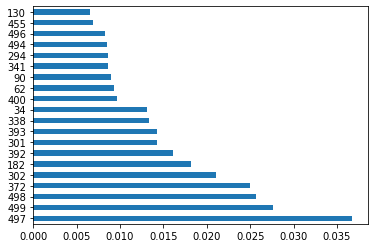

In [17]:
#Top 20 features
feat_importances = pd.Series(rf.feature_importances_, index=X_train_vect.columns.tolist())
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Confusion matrix, without normalization
[[676  96]
 [ 98 714]]


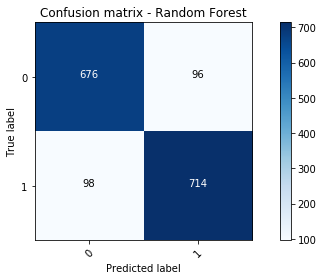

In [18]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Random Forest')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

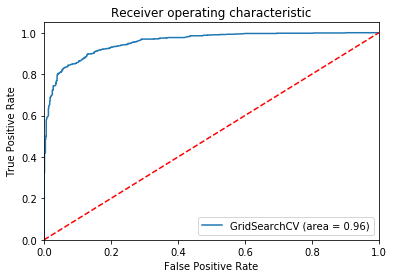

In [19]:
#Plotting ROC curve
from sklearn import metrics
probs = grid_rfc_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [20]:
#gbm using grid search
from sklearn.model_selection import GridSearchCV
gbm = GradientBoostingClassifier()
grid_values = {'n_estimators' : [150, 200, 500], 'max_depth' : [7, 11, 15]}
grid_gbm_acc = GridSearchCV(gbm, param_grid = grid_values)
grid_gbm_acc.fit(X_train_vect, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [21]:
grid_gbm_acc.best_params_

{'max_depth': 7, 'n_estimators': 500}

In [22]:
gb = GradientBoostingClassifier(n_estimators=500, max_depth=11)
start = time.time()
gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.8964646464646465
Precision : 0.907035175879397
Recall : 0.8891625615763546
F1 Score : 0.8980099502487562
Fit time : 0.049904823303222656
Predict time : 0.12491106986999512
Confusion Matrix : 
[[698  74]
 [ 90 722]]


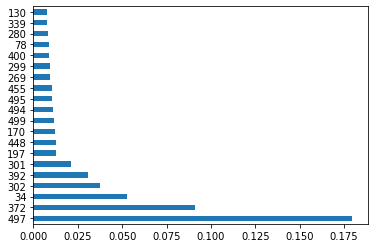

In [23]:
feat_importances = pd.Series(gb.feature_importances_, index=X_train_vect.columns.tolist())
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Confusion matrix, without normalization
[[698  74]
 [ 90 722]]


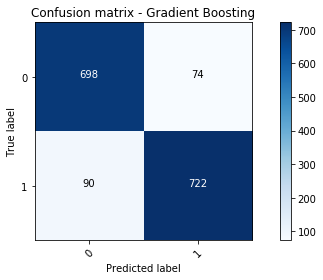

In [24]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Gradient Boosting')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

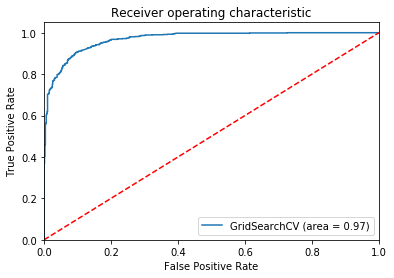

In [25]:
#Plotting ROC curve
from sklearn import metrics
probs = grid_gbm_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [27]:
! pip install xgboost

In [28]:
#xgbm using grid search
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgbm = XGBClassifier()
grid_values = {'n_estimators' : [150, 200, 500], 'max_depth' : [5, 7, 10]}
grid_xgbm_acc = GridSearchCV(xgbm, param_grid = grid_values)
grid_xgbm_acc.fit(X_train_vect, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
       

In [29]:
grid_xgbm_acc.best_params_

{'max_depth': 7, 'n_estimators': 500}

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=150, max_depth=10)
start = time.time()
xgb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = xgb.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.8970959595959596
Precision : 0.9061326658322904
Recall : 0.8916256157635468
F1 Score : 0.898820608317815
Fit time : 0.040894269943237305
Predict time : 0.12491106986999512
Confusion Matrix : 
[[697  75]
 [ 88 724]]


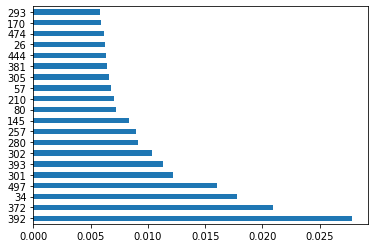

In [31]:
feat_importances = pd.Series(xgb.feature_importances_, index=X_train_vect.columns.tolist())
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Confusion matrix, without normalization
[[697  75]
 [ 88 724]]


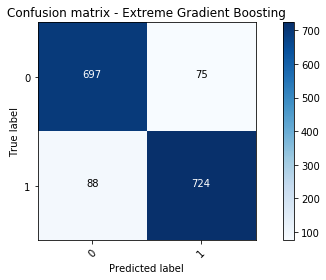

In [32]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Extreme Gradient Boosting')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

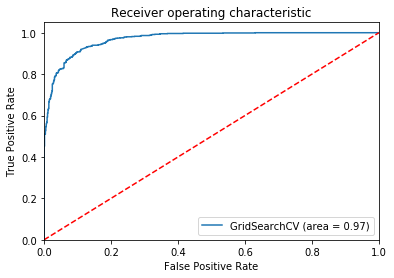

In [33]:
#Plotting ROC curve
from sklearn import metrics
probs = grid_xgbm_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
#logistic regression grid search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train_vect, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
grid_clf_acc.best_params_

{'C': 1, 'penalty': 'l2'}

In [37]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C = 1, penalty = 'l2')
start = time.time()
log.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = log.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.8983585858585859
Precision : 0.9003690036900369
Recall : 0.9014778325123153
F1 Score : 0.9009230769230769
Fit time : 0.0059854984283447266
Predict time : 0.12491106986999512
Confusion Matrix : 
[[691  81]
 [ 80 732]]


In [38]:
import numpy as np
logmodel = log.fit(X_train_vect, y_train)
coefs=logmodel.coef_[0]
top_three = np.argpartition(coefs, -20)[-20:]
#top_three_sorted=top_three[np.argsort(coefs[top_three])]
top_three

array([221, 105, 220, 182, 341, 280, 170, 392,  62, 321, 477, 294, 301,
       444, 338, 372,  80, 456,  90,  68], dtype=int64)

Confusion matrix, without normalization
[[691  81]
 [ 80 732]]


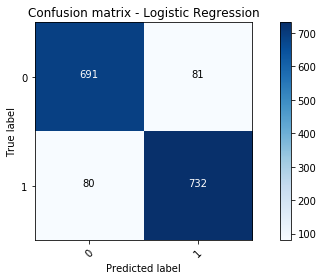

In [39]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Logistic Regression')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\

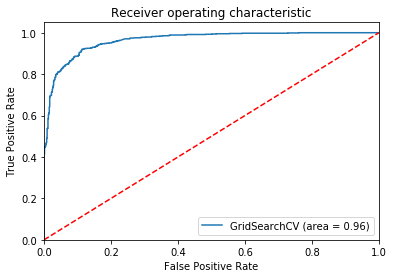

In [40]:
#Plotting ROC curve
from sklearn import metrics
probs = grid_clf_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [41]:
roc_auc

0.9637409390234565

In [42]:
#Using Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#nb = MultinomialNB()

nb = GaussianNB()
start = time.time()
nb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = nb.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.8333333333333334
Precision : 0.8366093366093366
Recall : 0.8386699507389163
F1 Score : 0.8376383763837638
Fit time : 0.021962404251098633
Predict time : 0.12491106986999512
Confusion Matrix : 
[[639 133]
 [131 681]]


Confusion matrix, without normalization
[[639 133]
 [131 681]]


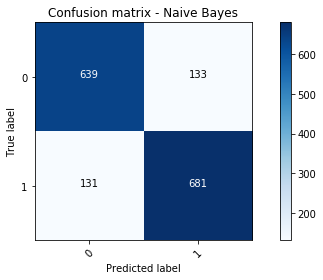

In [44]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Naive Bayes')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

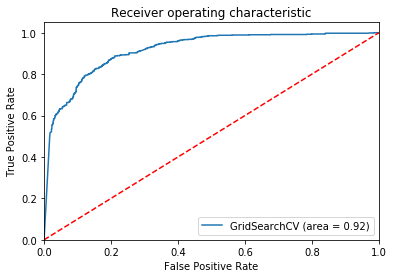

In [45]:
#Plotting ROC curve
from sklearn import metrics
probs = nb.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [46]:
#KNN using grid search
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10)

grid.fit(X_train_vect, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
grid.best_params_

{'n_neighbors': 1}

In [48]:
#Using K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 26)
start = time.time()
knn.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = knn.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.5505050505050505
Precision : 0.8289473684210527
Recall : 0.15517241379310345
F1 Score : 0.26141078838174275
Fit time : 7.45241379737854
Predict time : 0.12491106986999512
Confusion Matrix : 
[[746  26]
 [686 126]]


Confusion matrix, without normalization
[[746  26]
 [686 126]]


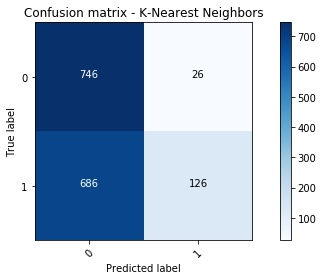

In [49]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - K-Nearest Neighbors')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

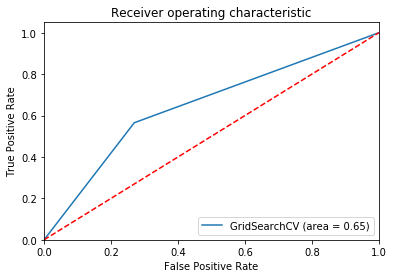

In [50]:
#Plotting ROC curve
from sklearn import metrics
probs = grid.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()